<div class="alert alert-success"> 
        <h1 align="center" style="color:red;">Regression: Prediction of Flood Probability
</h1>  
     
</div>

# Importing Librabries and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv('flood train data.csv')
test_data = pd.read_csv('flood test data.csv')

In [3]:
data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
test_data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


# Statistical description

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [6]:
data.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

No missing values in all our features

In [7]:
data.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


Since we have Ranked dataset, our correlation calculation will be Spearman

In [25]:
data.corr(method='spearman')

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.000000,0.000018,-0.001089,-0.000526,-0.000209,0.000425,-0.000293,0.000386,0.000499,-0.000381,...,0.000114,-0.001577,0.001198,0.000612,-0.000367,0.000395,0.000942,-0.001623,-0.000028,0.000236
MonsoonIntensity,0.000018,1.000000,-0.004982,-0.006740,-0.005778,-0.007388,-0.007058,-0.006161,-0.006225,-0.006448,...,-0.008737,-0.008850,-0.007677,-0.006440,-0.007662,-0.006737,-0.005425,-0.006456,-0.006869,0.180140
TopographyDrainage,-0.001089,-0.004982,1.000000,-0.007243,-0.006468,-0.007810,-0.006875,-0.005298,-0.007374,-0.007652,...,-0.007292,-0.009810,-0.007957,-0.007879,-0.004430,-0.007620,-0.007895,-0.008132,-0.009162,0.180424
RiverManagement,-0.000526,-0.006740,-0.007243,1.000000,-0.006062,-0.009710,-0.006152,-0.005388,-0.007674,-0.008361,...,-0.009464,-0.008483,-0.006448,-0.008155,-0.003812,-0.004566,-0.007458,-0.007351,-0.008817,0.178923
Deforestation,-0.000209,-0.005778,-0.006468,-0.006062,1.000000,-0.010289,-0.006289,-0.007568,-0.009263,-0.007951,...,-0.008765,-0.010339,-0.006547,-0.008779,-0.007005,-0.009029,-0.008369,-0.007939,-0.007362,0.176658
Urbanization,0.000425,-0.007388,-0.007810,-0.009710,-0.010289,1.000000,-0.008667,-0.008602,-0.007927,-0.007737,...,-0.010042,-0.011368,-0.007586,-0.009214,-0.008728,-0.008935,-0.008790,-0.009357,-0.010825,0.172157
ClimateChange,-0.000293,-0.007058,-0.006875,-0.006152,-0.006289,-0.008667,1.000000,-0.006245,-0.007351,-0.009721,...,-0.007277,-0.010633,-0.006919,-0.007231,-0.004433,-0.007423,-0.006654,-0.008133,-0.009086,0.176525
DamsQuality,0.000386,-0.006161,-0.005298,-0.005388,-0.007568,-0.008602,-0.006245,1.000000,-0.007010,-0.006533,...,-0.007919,-0.009578,-0.007895,-0.006494,-0.007518,-0.006718,-0.006778,-0.008643,-0.010502,0.179767
Siltation,0.000499,-0.006225,-0.007374,-0.007674,-0.009263,-0.007927,-0.007351,-0.007010,1.000000,-0.008057,...,-0.009080,-0.009058,-0.006291,-0.006921,-0.004587,-0.006436,-0.006715,-0.005981,-0.005564,0.178611
AgriculturalPractices,-0.000381,-0.006448,-0.007652,-0.008361,-0.007951,-0.007737,-0.009721,-0.006533,-0.008057,1.000000,...,-0.009211,-0.009005,-0.008379,-0.007808,-0.006375,-0.006812,-0.008900,-0.007534,-0.008592,0.175142


Averagely all features have 18% correlation value with the Target feature, FloodProbability

In [9]:
data.cov()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.041524e+11,-61.759861,-1026.107210,-276.207641,-52.659337,389.782663,-124.632148,89.539639,187.660623,-68.563884,...,373.255167,-934.032916,723.201664,144.422186,-256.519185,418.432890,621.689285,-1031.157345,-104.618108,-3.030988
MonsoonIntensity,-6.175986e+01,4.228726,-0.031698,-0.034389,-0.030593,-0.039882,-0.033984,-0.033357,-0.033289,-0.035016,...,-0.041406,-0.045785,-0.038981,-0.038110,-0.036034,-0.037019,-0.028976,-0.034899,-0.036428,0.019842
TopographyDrainage,-1.026107e+03,-0.031698,4.384330,-0.043058,-0.036721,-0.045943,-0.041444,-0.033180,-0.042500,-0.041130,...,-0.043636,-0.054786,-0.044560,-0.048256,-0.028654,-0.046971,-0.044474,-0.050622,-0.054055,0.020047
RiverManagement,-2.762076e+02,-0.034389,-0.043058,4.293956,-0.036452,-0.053068,-0.039386,-0.037602,-0.043058,-0.046221,...,-0.048426,-0.050557,-0.038733,-0.049246,-0.024930,-0.028913,-0.043165,-0.041714,-0.050031,0.019786
Deforestation,-5.265934e+01,-0.030593,-0.036721,-0.036452,4.209430,-0.052354,-0.034897,-0.039984,-0.048897,-0.042607,...,-0.044599,-0.053090,-0.039473,-0.045590,-0.037541,-0.050116,-0.046706,-0.044507,-0.041433,0.019263
Urbanization,3.897827e+02,-0.039882,-0.045943,-0.053068,-0.052354,4.340518,-0.048009,-0.048293,-0.043701,-0.045507,...,-0.054280,-0.063090,-0.045820,-0.052526,-0.045842,-0.049631,-0.047509,-0.050227,-0.056639,0.019227
ClimateChange,-1.246321e+02,-0.033984,-0.041444,-0.039386,-0.034897,-0.048009,4.234302,-0.036122,-0.040205,-0.049021,...,-0.041151,-0.055899,-0.039994,-0.042343,-0.026869,-0.044100,-0.039910,-0.046129,-0.048947,0.019400
DamsQuality,8.953964e+01,-0.033357,-0.033180,-0.037602,-0.039984,-0.048293,-0.036122,4.339152,-0.040459,-0.038924,...,-0.045062,-0.052632,-0.042965,-0.039410,-0.042282,-0.041474,-0.040384,-0.049309,-0.056958,0.019982
Siltation,1.876606e+02,-0.033289,-0.042500,-0.043058,-0.048897,-0.043701,-0.040205,-0.040459,4.268322,-0.043501,...,-0.045819,-0.050759,-0.039384,-0.040687,-0.026928,-0.037450,-0.037040,-0.039037,-0.036678,0.019691
AgriculturalPractices,-6.856388e+01,-0.035016,-0.041130,-0.046221,-0.042607,-0.045507,-0.049021,-0.038924,-0.043501,4.278879,...,-0.046491,-0.049322,-0.045671,-0.042651,-0.037194,-0.038434,-0.048749,-0.044848,-0.048244,0.019354


The covariance shows that all features have positive relationship with the target feature, FloodProbability.
Also worth noting is that the effect seems to be averagely similar.

# Visualizaation

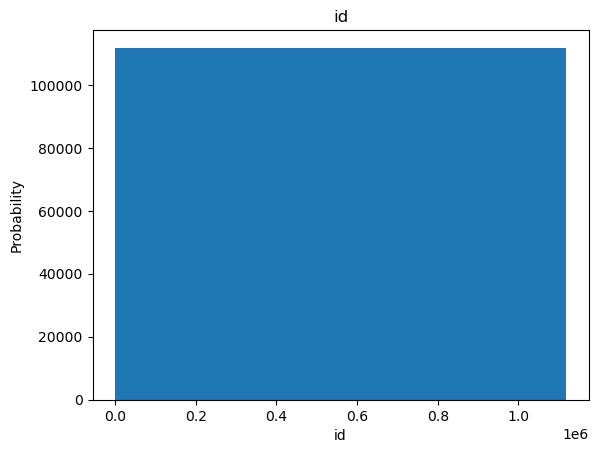

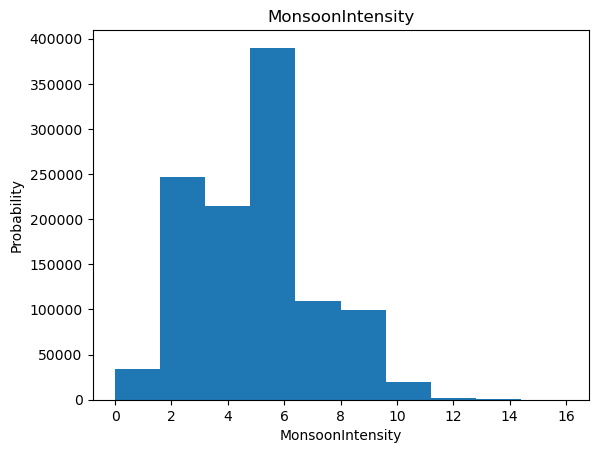

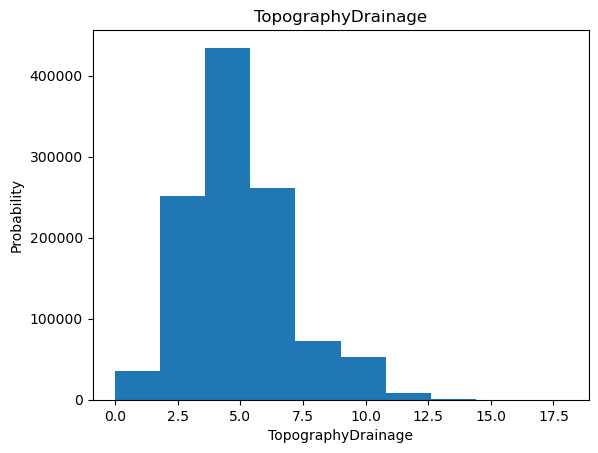

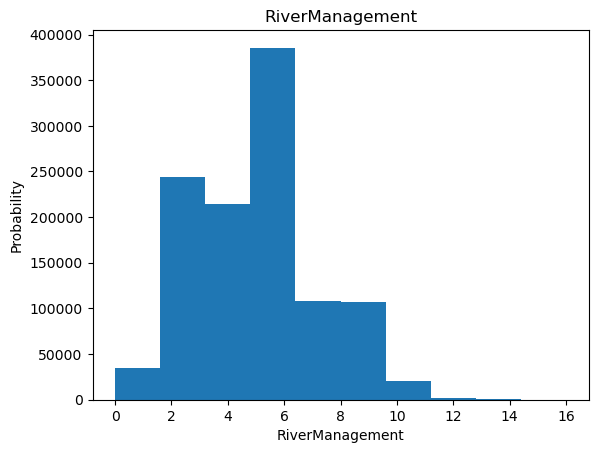

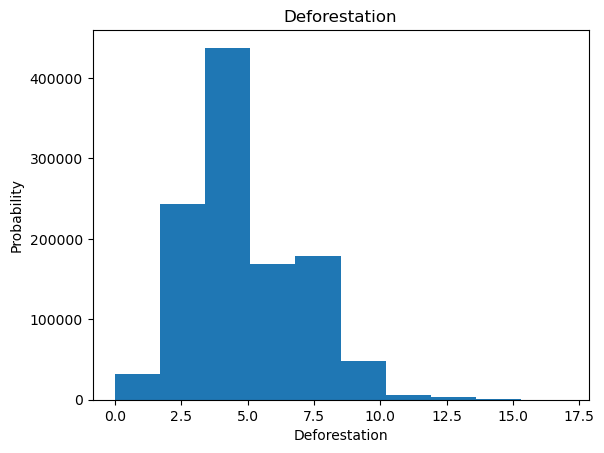

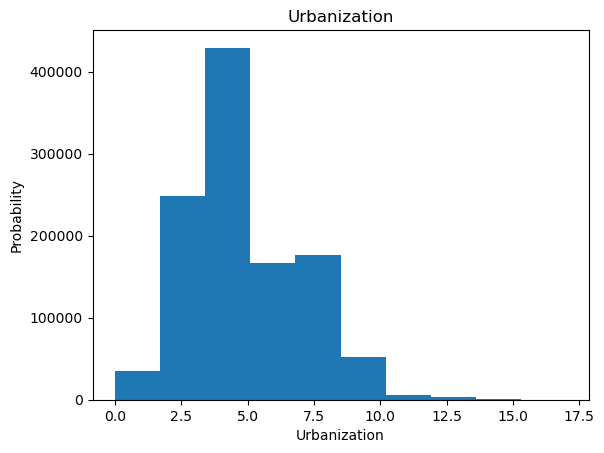

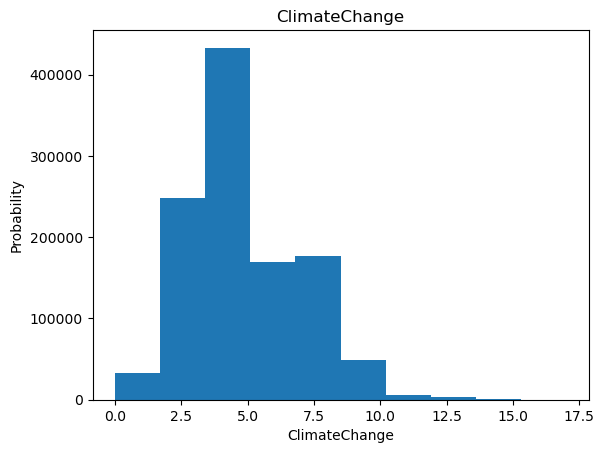

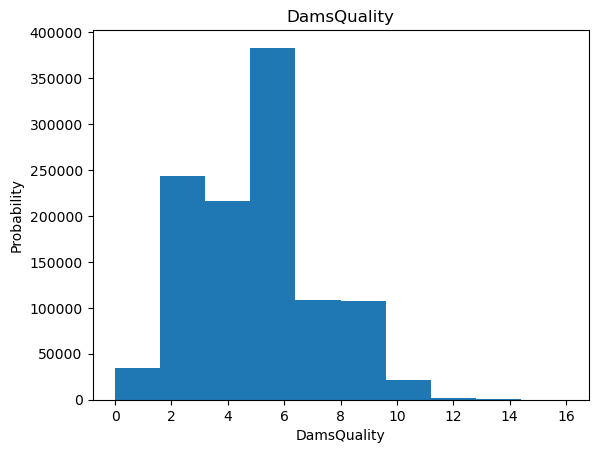

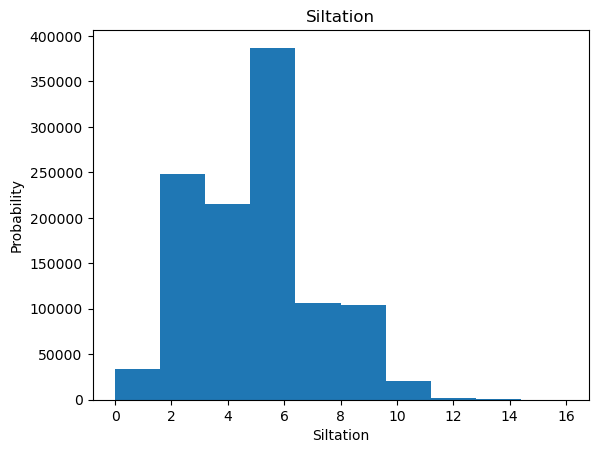

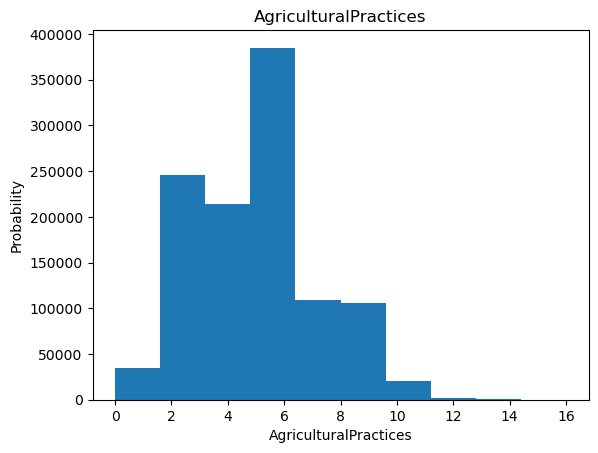

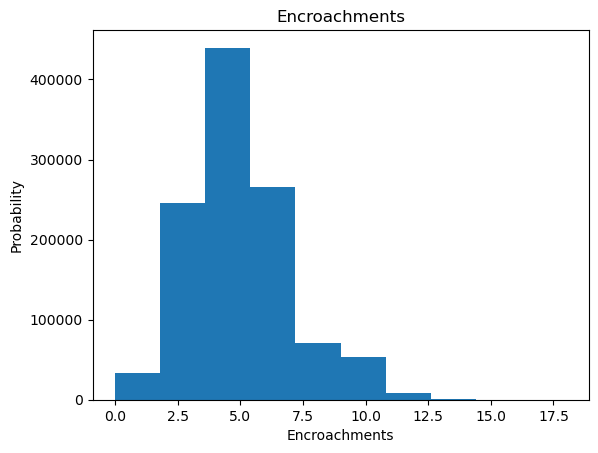

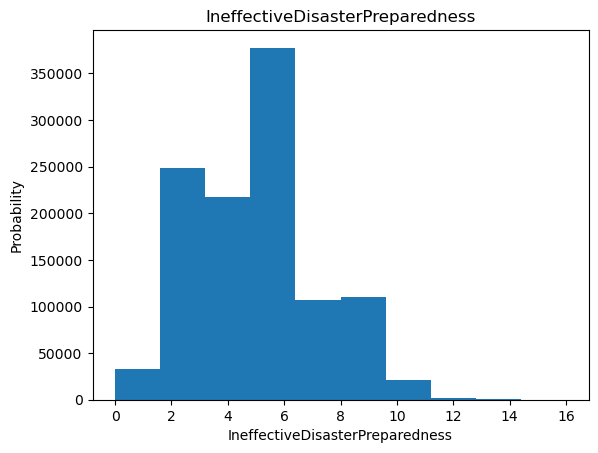

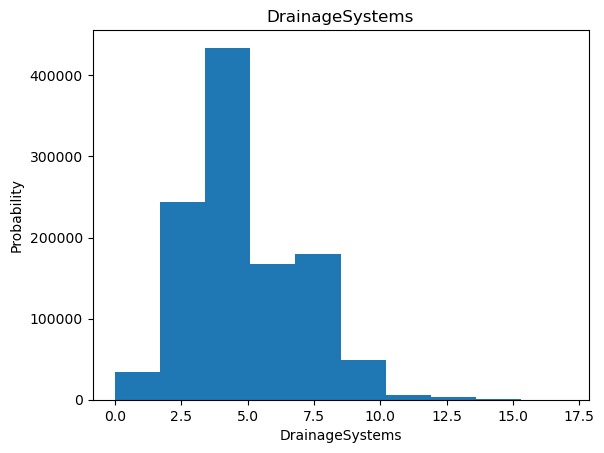

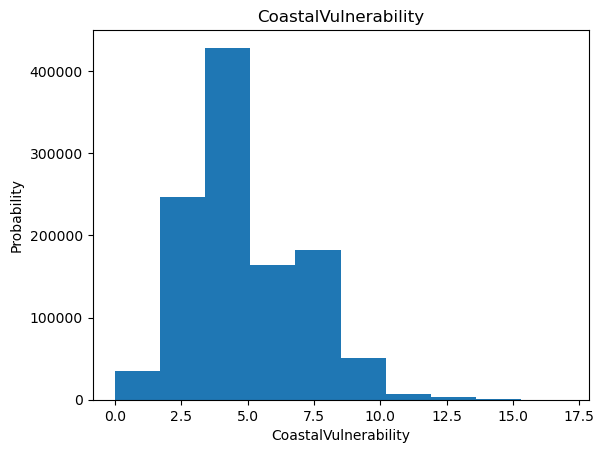

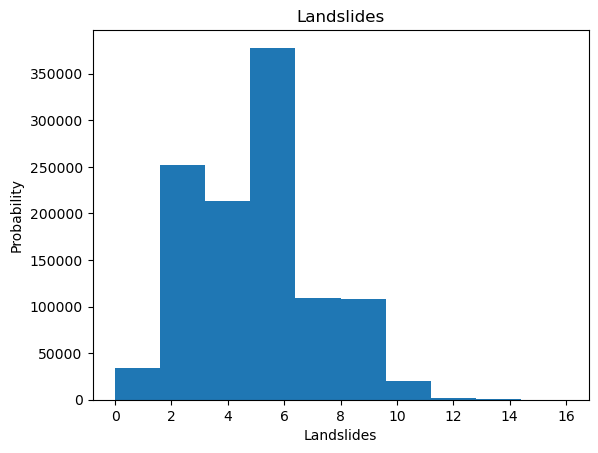

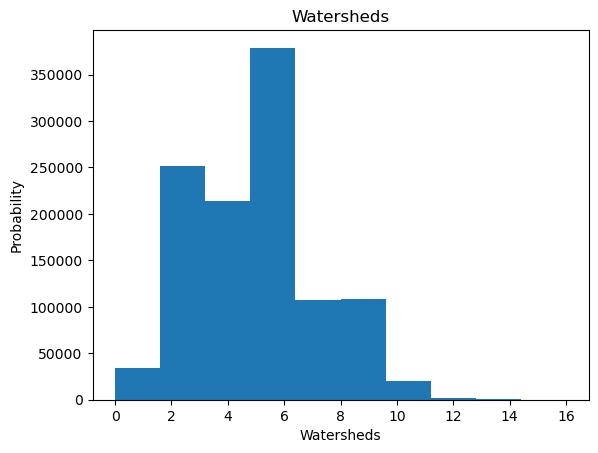

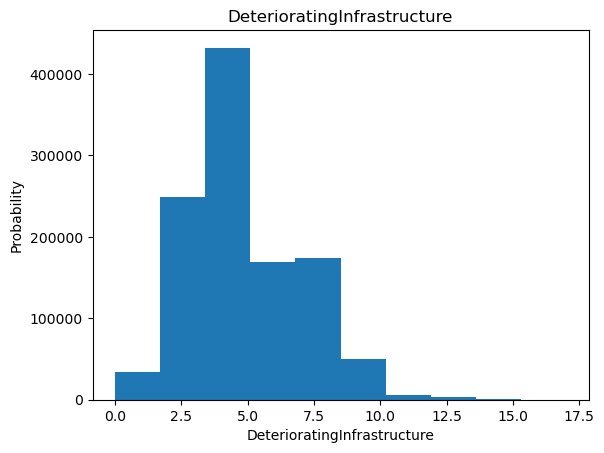

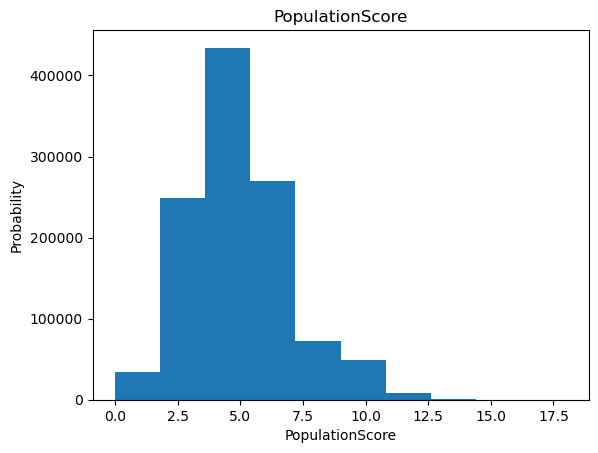

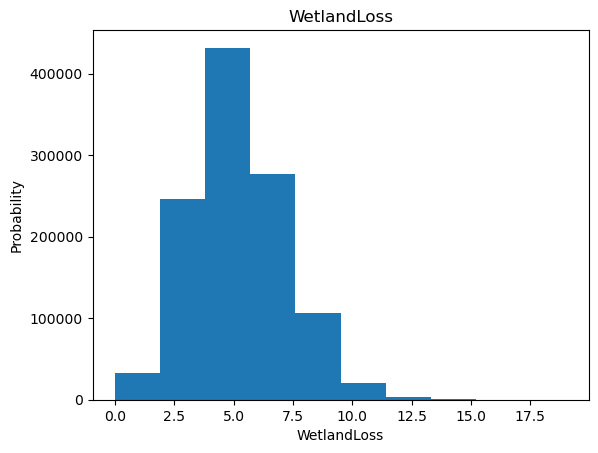

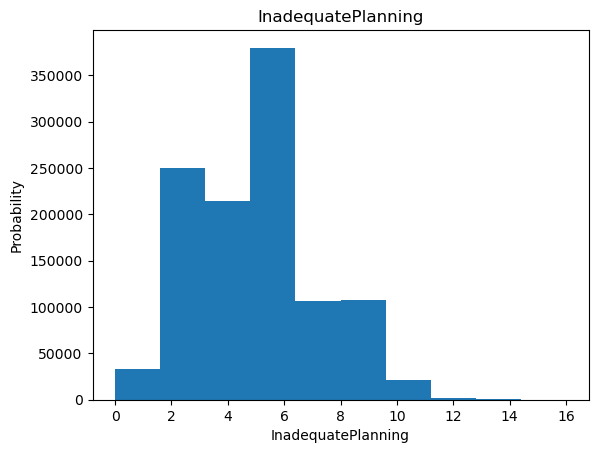

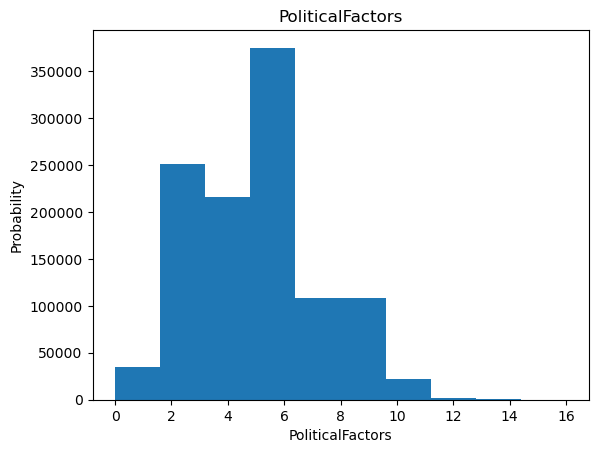

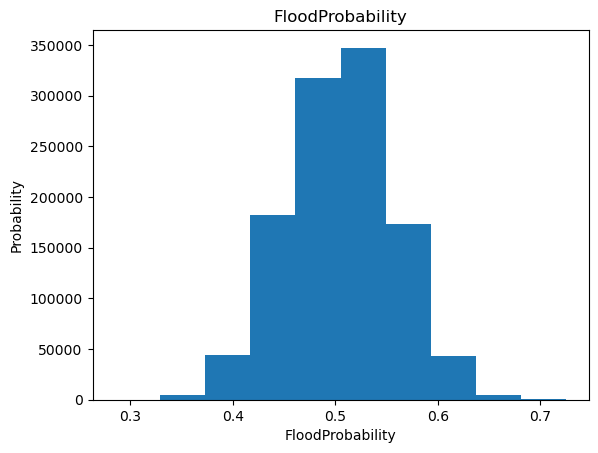

In [10]:
for column in data.columns:
    plt.hist(data[column])
    plt.title(column)
    plt.ylabel("Probability")
    plt.xlabel(column)
    plt.show()

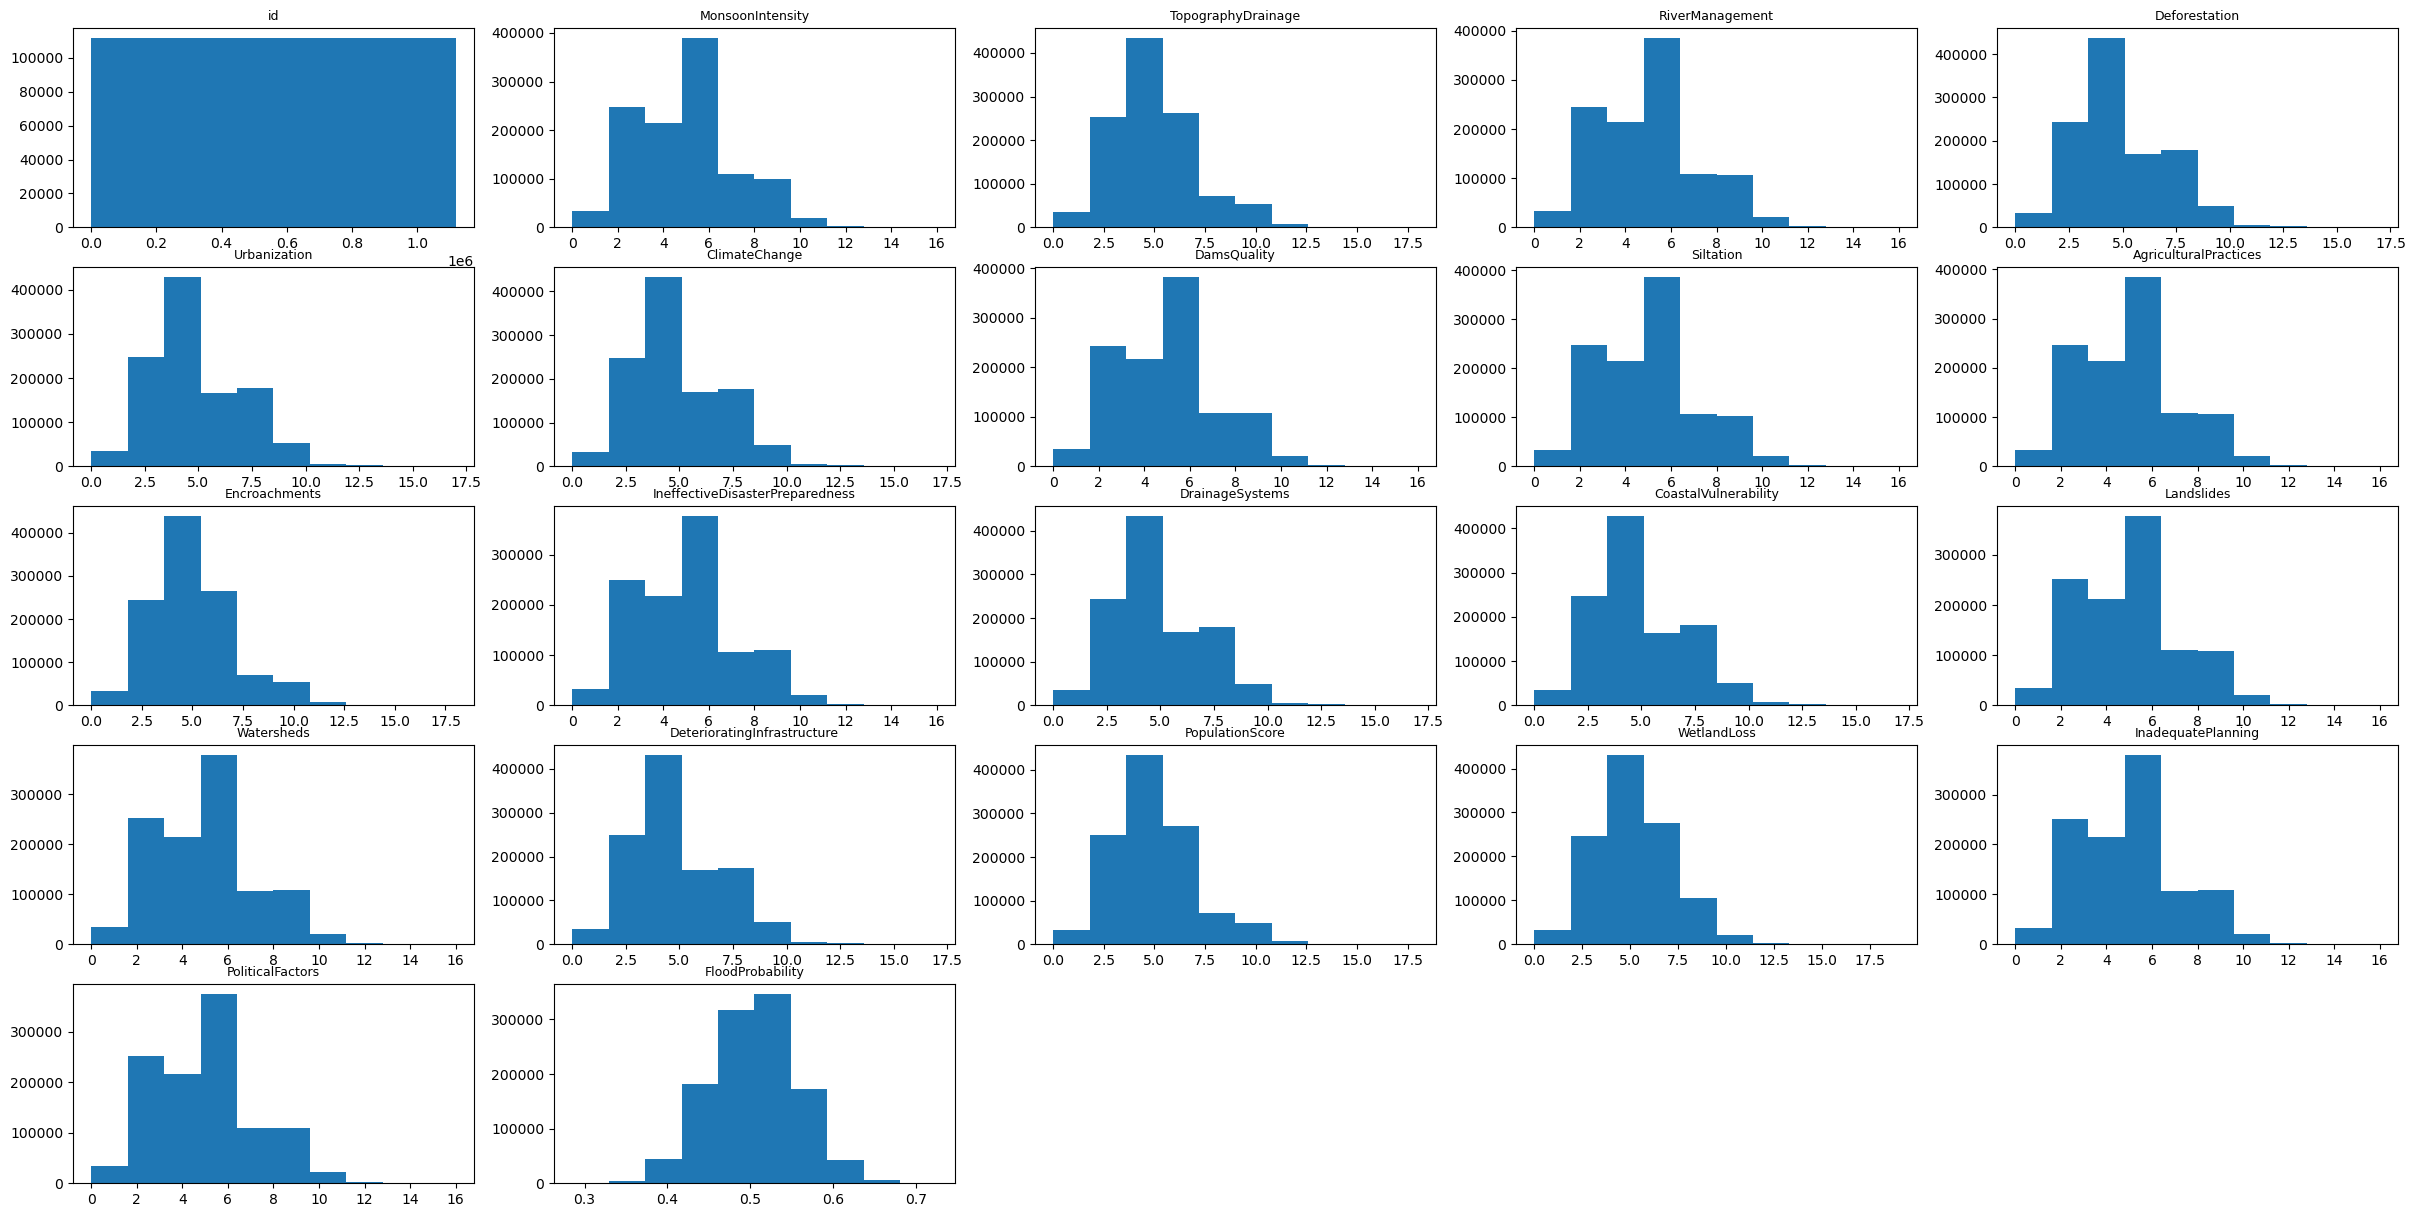

In [11]:
(fig, axes) = plt.subplots(nrows=5,ncols=5, figsize=(30,15), sharex = False)     #, dpi=850
fig.delaxes(axes[4,2]); fig.delaxes(axes[4,3]); fig.delaxes(axes[4,4])
no_of_col = 22
feature = 0
col1=0; col2=0; col3=0; col4=0; col5=0
plot = 0

while plot < 22:
    responses = data[data.columns[feature]].values
    responses = list(responses)
    if feature < 5:
        axes[0][col1].hist(responses)
        axes[0][col1].set_title(data.columns[feature], fontsize = 9)
        feature+=1
        col1+=1
        plot+=1
    elif feature in range(5,10):
        axes[1][col2].hist(responses)
        axes[1][col2].set_title(data.columns[feature], fontsize = 9)
        feature+=1
        col2+=1
        plot+=1
    elif feature in range(10,15):
        axes[2][col3].hist(responses)
        axes[2][col3].set_title(data.columns[feature], fontsize = 9)
        feature+=1
        col3+=1
        plot+=1
    elif feature in range(15,20):
        axes[3][col4].hist(responses)
        axes[3][col4].set_title(data.columns[feature], fontsize = 9)
        feature+=1
        col4+=1
        plot+=1
    else:
        axes[4][col5].hist(responses)
        axes[4][col5].set_title(data.columns[feature], fontsize = 9)
        feature+=1
        col5+=1
        plot+=1

All features are fairly normally distributed

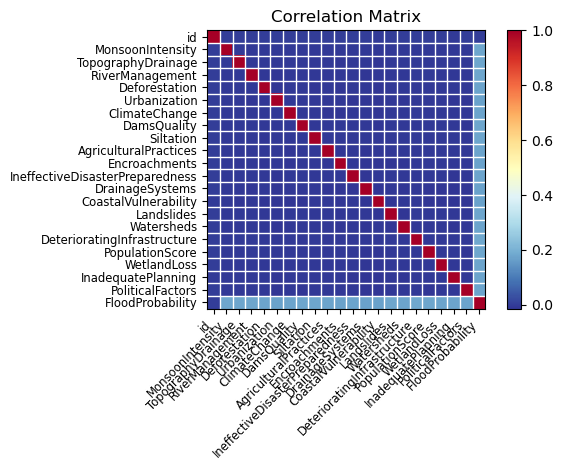

In [26]:
import statsmodels.api as sm

corr = data.corr(method='spearman')
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# VIF

Checking for Variance INflation Factor VIF in order to avoid Multicollinearity among the features

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = np.array(add_constant(data), dtype=float)

vif = pd.Series([variance_inflation_factor(X, i) for i in range(X.shape[1])])
vif

0     152.517829
1       1.000011
2       1.331574
3       1.348860
4       1.343868
5       1.338782
6       1.347294
7       1.338716
8       1.346030
9       1.338225
10      1.339117
11      1.346542
12      1.343053
13      1.340917
14      1.351291
15      1.343013
16      1.345418
17      1.334803
18      1.346067
19      1.339142
20      1.340360
21      1.348455
22      6.449539
dtype: float64

None of the features VIF value over 10, hence indicating that no 2 independent features are highly correlated

# Model Training: Linear Regression

#### X/y split

In [14]:


X = data.drop(['FloodProbability'], axis=1).values
y = data['FloodProbability'].values

X_test = test_data.values

#### Train test split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80, random_state=10)
X_val = X_test

#### Model 1 Training: LinearRegression

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_val)
y_pred

array([0.49982022, 0.460527  , 0.53935673, ..., 0.60169257, 0.49432232,
       0.57350446])

#### Metric Test

In [18]:
#R square for LinearRegression
model.score(X_test,y_test)

0.8459158953156948

#### Fitness Plot

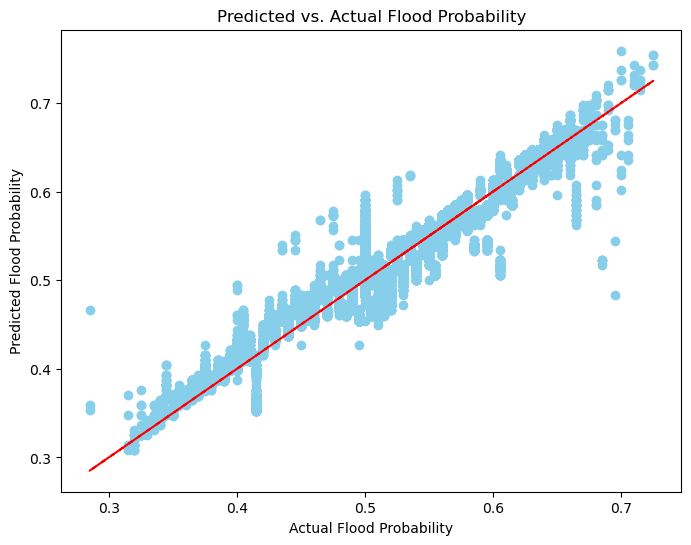

In [19]:
# Scatter Plot of Predicted vs. Actual Sale Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, model.predict(X_test), color='skyblue')
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title('Predicted vs. Actual Flood Probability')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.show()


#### Feature Importance

In [27]:
# Feature Importance

columns = data.drop(['FloodProbability'], axis=1).columns
feature_importance = pd.DataFrame({'Feature':columns,
                                  'Importance':model.coef_},
                                 index=np.arange(len(columns)))

#feature_importance['Percentage'] = (feature_importance['Importance']/feature_importance['Importance'].sum())*100
feature_importance = feature_importance.sort_values('Importance')
feature_importance

,Feature,Importance
0,id,7.277632e-12
19,InadequatePlanning,5.608111e-03
1,MonsoonIntensity,5.610909e-03
16,DeterioratingInfrastructure,5.613756e-03
9,AgriculturalPractices,5.630948e-03
14,Landslides,5.635706e-03
18,WetlandLoss,5.638735e-03
12,DrainageSystems,5.639374e-03
11,IneffectiveDisasterPreparedness,5.641750e-03
8,Siltation,5.642666e-03


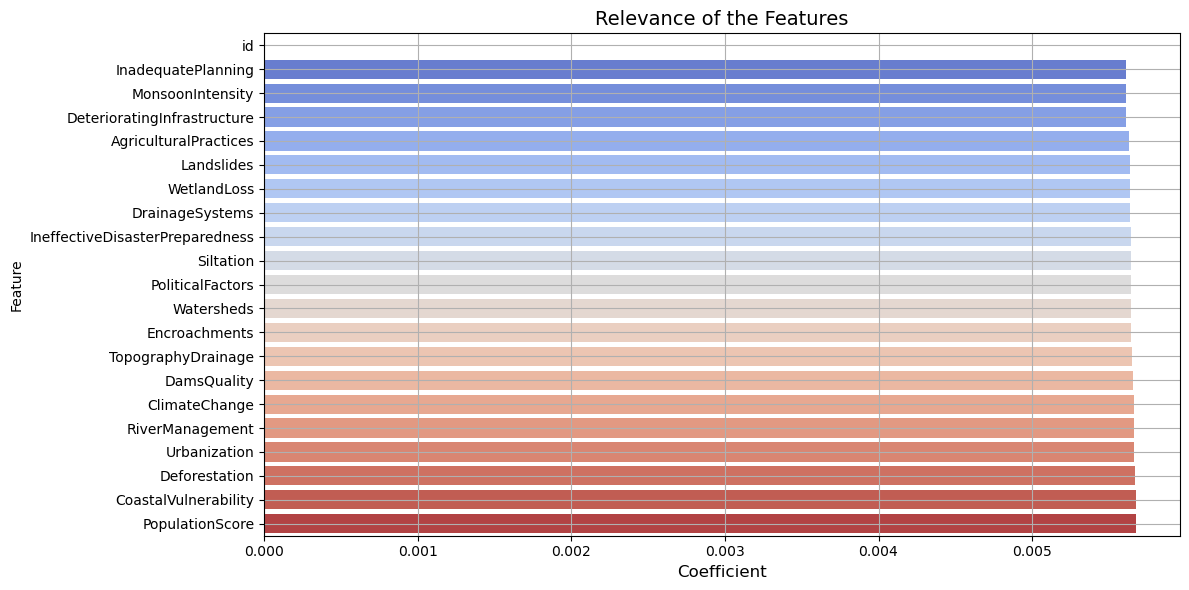

In [29]:
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.barplot(y=feature_importance['Feature'], x=feature_importance['Importance'], palette="coolwarm")
plt.xlabel("Coefficient", fontsize=12)
plt.title('Relevance of the Features', fontsize=14)
plt.grid()
plt.tight_layout()

#### Model 2 OLS modelling

In [30]:
import statsmodels.api as sm

y_train = np.array(y_train, dtype=np.float64)

X_train_df = pd.DataFrame(X_train)
column_name = list(data.drop(['FloodProbability'],axis=1).columns)
X_train_df.columns = column_name
X_train = np.array(X_train, dtype=np.float64)



lm1 = sm.OLS(y_train,sm.add_constant(X_train)).fit()
print(lm1.summary(xname=['const']+column_name))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 2.317e+05
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        01:34:58   Log-Likelihood:             2.2253e+06
No. Observations:              894365   AIC:                        -4.451e+06
Df Residuals:                  894343   BIC:                        -4.450e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [37]:
lm1.params[1:]

array([7.27763230e-12, 5.61090943e-03, 5.64803276e-03, 5.66482175e-03,
       5.67259317e-03, 5.66618290e-03, 5.66068283e-03, 5.65837896e-03,
       5.64266580e-03, 5.63094797e-03, 5.64681044e-03, 5.64174986e-03,
       5.63937397e-03, 5.67326497e-03, 5.63570625e-03, 5.64541138e-03,
       5.61375643e-03, 5.67874345e-03, 5.63873522e-03, 5.60811107e-03,
       5.64486181e-03])

#### Features Importance plot

In [38]:
# Feature Importance

columns = data.drop(['FloodProbability'], axis=1).columns
feature_importance1 = pd.DataFrame({'Feature':columns,
                                  'Importance':lm1.params[1:]},
                                 index=np.arange(len(columns)))

#feature_importance['Percentage'] = (feature_importance['Importance']/feature_importance['Importance'].sum())*100
feature_importance1 = feature_importance.sort_values('Importance')
feature_importance1

,Feature,Importance
0,id,7.277632e-12
19,InadequatePlanning,5.608111e-03
1,MonsoonIntensity,5.610909e-03
16,DeterioratingInfrastructure,5.613756e-03
9,AgriculturalPractices,5.630948e-03
14,Landslides,5.635706e-03
18,WetlandLoss,5.638735e-03
12,DrainageSystems,5.639374e-03
11,IneffectiveDisasterPreparedness,5.641750e-03
8,Siltation,5.642666e-03


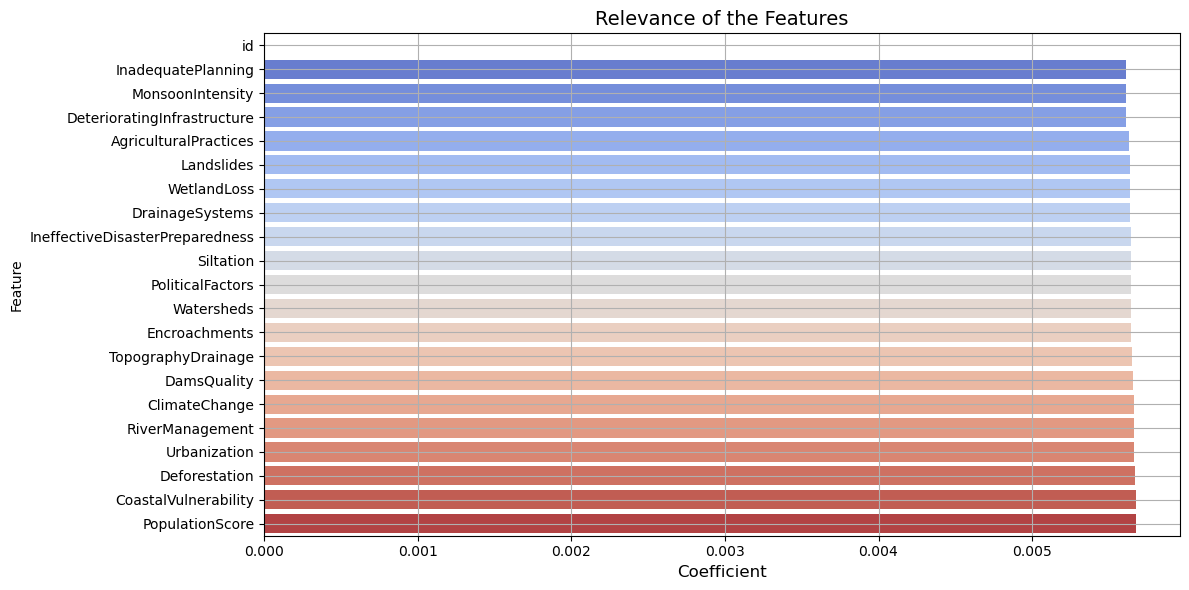

In [39]:
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.barplot(y=feature_importance1['Feature'], x=feature_importance1['Importance'], palette="coolwarm")
plt.xlabel("Coefficient", fontsize=12)
plt.title('Relevance of the Features', fontsize=14)
plt.grid()
plt.tight_layout()

#### Submission

In [20]:
submission = pd.DataFrame()

submission['id'] = X_val[:,0]
submission['FloodProbability'] = y_pred

In [21]:
submission

,id,FloodProbability
0,740419,0.499820
1,1059792,0.460527
2,478337,0.539357
3,471962,0.466156
4,963634,0.505484
...,...,...
223587,1060255,0.528009
223588,920408,0.386798
223589,758183,0.601693
223590,936396,0.494322


In [22]:
submission.to_csv('submission.csv', index=False)

# Conclusion

All features used in the dataset shows high importance  and are all considered important.